In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('data.csv')
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [54]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [55]:
df['Дата'] = pd.to_datetime(df['Дата'])

In [56]:
print(df.head())

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2


Сгруппируйте данные по дате, посчитайте количество продаж

In [57]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()

Вывести несколько первых строк сгруппированных данных

In [58]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

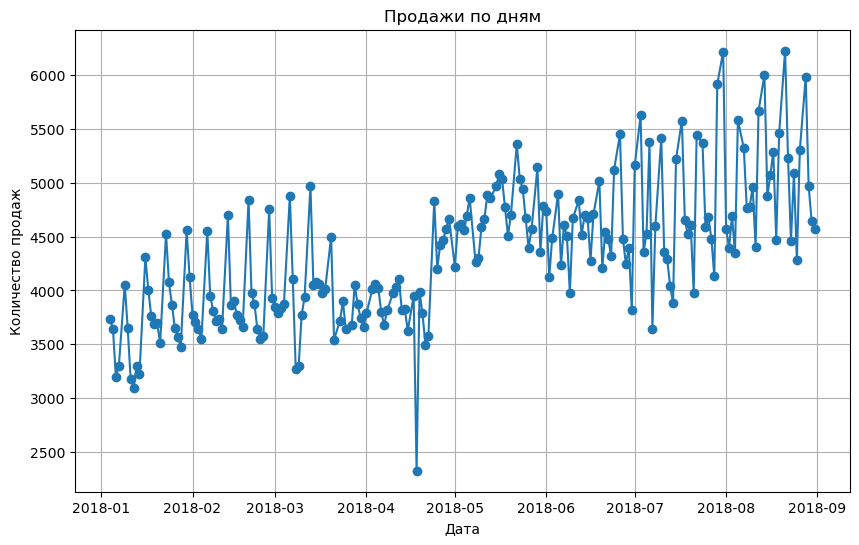

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o')
plt.title('Продажи по дням')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [60]:
# На графике мы видем продажи по количеству за период с января по сентябрь 2018 года,
# количество максимальных и минимальных продаж (выбросы)
# и судя по графику имеют стабильные продажи.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [61]:
max_sales_row = df.loc[df['Количество'].idxmax()]
print(max_sales_row)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [62]:
# Создаем столбец для дня недели (0 - понедельник, 1 - вторник, ..., 6 - воскресенье)
df['День недели'] = df['Дата'].dt.dayofweek

# Фильтруем данные для июня, июля и августа, для среды (день недели == 2), для 3 склада
df_filtered = df[(df['Дата'].dt.month.isin([6, 7, 8])) & 
                 (df['День недели'] == 2) & 
                 (df['Склад'] == 3)]

# Группируем по товару и считаем сумму продаж
top_product = df_filtered.groupby('Номенклатура')['Количество'].sum().idxmax()
print(f"Топовый товар: {top_product}")

Топовый товар: product_1


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [63]:
pwd

'C:\\Users\\ww\\Pyton курсы'

In [64]:
weather_df = pd.read_csv('weater_data1.csv')

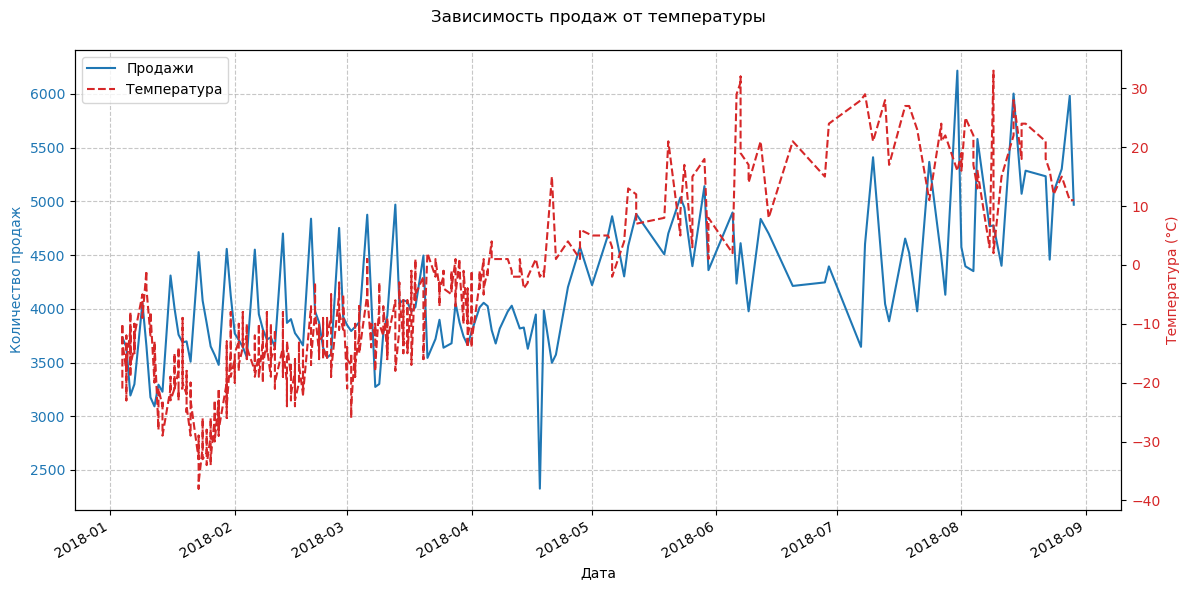

In [68]:
weather_df['Дата'] = pd.to_datetime(weather_df['Дата'])
weather_df = weather_df[['Дата', 'T']]

merged_df = pd.merge(grouped_df, weather_df, on='Дата')

# Создание графика с двумя осями Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# График продаж (ось Y слева)
color = 'tab:blue'
ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество продаж', color=color)
ax1.plot(merged_df['Дата'], merged_df['Количество'], color=color, label='Продажи')
ax1.tick_params(axis='y', labelcolor=color)

# Создание второй оси Y для температуры
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Температура (°C)', color=color)
ax2.plot(merged_df['Дата'], merged_df['T'], color=color, label='Температура', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

# Добавление заголовка и сетки
plt.title('Зависимость продаж от температуры', pad=20)
ax1.grid(True, linestyle='--', alpha=0.7)

# Объединение легенд
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

fig.autofmt_xdate()

plt.tight_layout()
plt.show()